# Train a Classification Recurrent Network with audio features only

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_on_training(txt, max_epochs=100, max_loss=5, batch_size=380):
    loss = re.findall('- loss: \d+\.\d+', txt)
    accuracy = re.findall('- acc: \d+\.\d+', txt)
    val_loss = re.findall('- val_loss: \d+\.\d+', txt)
    val_accuracy = re.findall('- val_acc: \d+\.\d+', txt)

    loss = np.array([float(x[8:]) for x in loss], dtype=np.float32)
    accuracy = np.array([float(x[7:]) for x in accuracy], dtype=np.float32)
    val_loss = np.array([float(x[12:]) for x in val_loss], dtype=np.float32)
    val_accuracy = np.array([float(x[11:]) for x in val_accuracy], dtype=np.float32)
    
    t = np.arange(1, len(val_loss)+1).astype(np.int64)
    fig, ax1 = plt.subplots(figsize=(18, 10), dpi=100)
    ax1.plot(t, loss[(batch_size-1)::batch_size], 'b-')
    ax1.plot(t, val_loss, 'b-.')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color='b')
    ax1.set_xlim([0,max_epochs])
    ax1.set_ylim([0,max_loss])
    for tl in ax1.get_yticklabels():
        tl.set_color('b')

    ax2 = ax1.twinx()
    ax2.plot(t, accuracy[(batch_size-1)::batch_size], 'r-')
    ax2.plot(t, val_accuracy, 'r-.')
    ax2.set_ylabel('Accuracy', color='r')
    ax2.set_xlim([0,max_epochs])
    ax2.set_ylim([0, 1])
    for tl in ax2.get_yticklabels():
        tl.set_color('r')
    plt.show()

# Experiment 1

Only one recurrent layer (512-LSTM) to learn from the audio features. Batch normalization for each kind of feature: mfcc and spec. At the end a softmax layer to classify the activity for the sequence returned by the recurrent layer. Use the sample weight property to weight the loss for background instances and try to make it slower its training.
The learning rate is `1e-5`. 

```
nb_experiment: 1
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 1e-05
background_weight: 0.6
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
mfcc_features (InputLayer)       (256, 20, 80)         0                                            
____________________________________________________________________________________________________
spec_features (InputLayer)       (256, 20, 8)          0                                            
____________________________________________________________________________________________________
mfcc_normalization (BatchNormaliz(256, 20, 80)         160         mfcc_features[0][0]              
____________________________________________________________________________________________________
spec_normalization (BatchNormaliz(256, 20, 8)          16          spec_features[0][0]              
____________________________________________________________________________________________________
merge_1 (Merge)                  (256, 20, 88)         0           mfcc_normalization[0][0]         
                                                                   spec_normalization[0][0]         
____________________________________________________________________________________________________
lstm (LSTM)                      (256, 20, 512)        1230848     merge_1[0][0]                    
____________________________________________________________________________________________________
fc (TimeDistributed)             (256, 20, 201)        103113      lstm[0][0]                       
====================================================================================================
Total params: 1334137
____________________________________________________________________________________________________
```

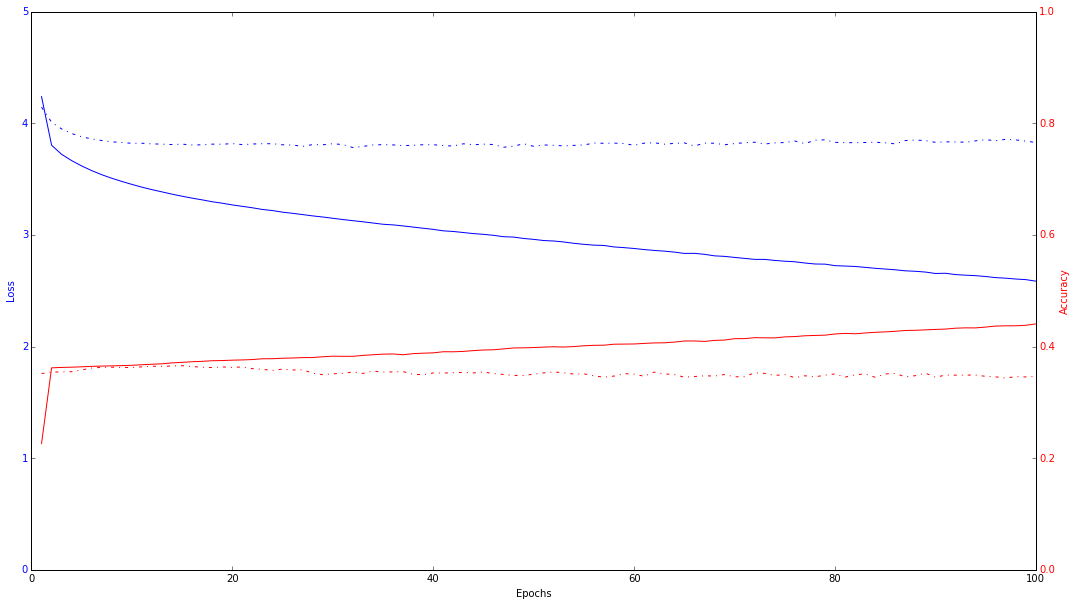

In [2]:
with open('../logs/training_e01.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

# Experiment 2

Only one recurrent layer (512-LSTM) to learn from the audio features. Batch normalization for each kind of feature: mfcc and spec. At the end a softmax layer to classify the activity for the sequence returned by the recurrent layer. Use the sample weight property to weight the loss for background instances and try to make it slower its training.
The learning rate is `1e-3`. 

```
nb_experiment: 2
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 0.001
background_weight: 0.6
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
mfcc_features (InputLayer)       (256, 20, 80)         0                                            
____________________________________________________________________________________________________
spec_features (InputLayer)       (256, 20, 8)          0                                            
____________________________________________________________________________________________________
mfcc_normalization (BatchNormaliz(256, 20, 80)         160         mfcc_features[0][0]              
____________________________________________________________________________________________________
spec_normalization (BatchNormaliz(256, 20, 8)          16          spec_features[0][0]              
____________________________________________________________________________________________________
merge_1 (Merge)                  (256, 20, 88)         0           mfcc_normalization[0][0]         
                                                                   spec_normalization[0][0]         
____________________________________________________________________________________________________
lstm (LSTM)                      (256, 20, 512)        1230848     merge_1[0][0]                    
____________________________________________________________________________________________________
fc (TimeDistributed)             (256, 20, 201)        103113      lstm[0][0]                       
====================================================================================================
Total params: 1334137
____________________________________________________________________________________________________
```

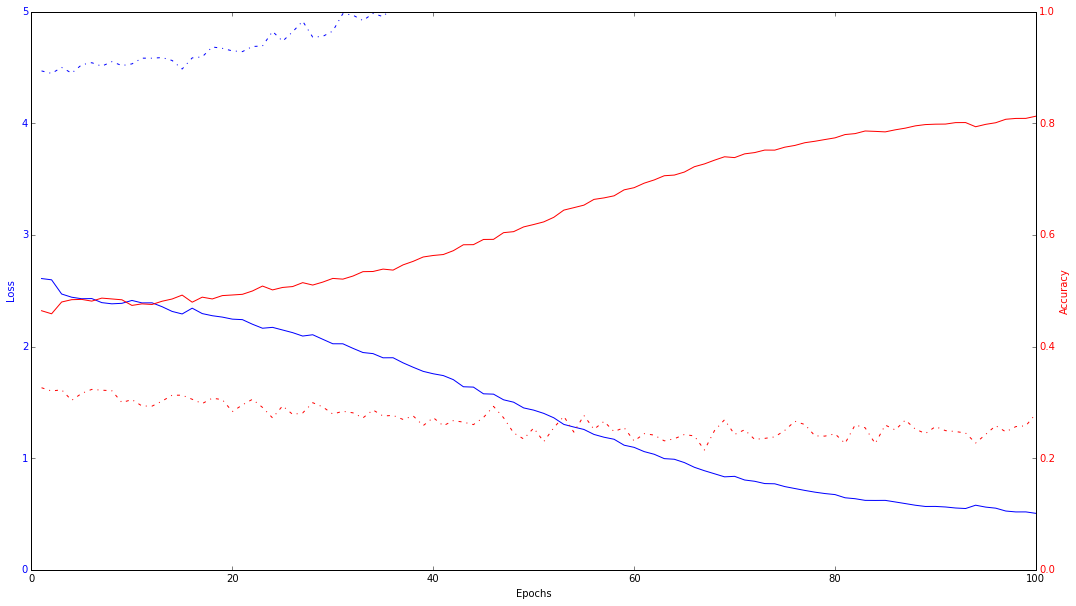

In [3]:
with open('../logs/training_e02.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

# Experiment 3

Only one recurrent layer (128-LSTM) to learn from the audio features. Batch normalization for each kind of feature: mfcc and spec. At the end a softmax layer to classify the activity for the sequence returned by the recurrent layer. Use the sample weight property to weight the loss for background instances and try to make it slower its training.
The learning rate is `1e-4`. 

```
nb_experiment: 3
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 0.0001
background_weight: 0.6

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
mfcc_features (InputLayer)       (256, 20, 80)         0                                            
____________________________________________________________________________________________________
spec_features (InputLayer)       (256, 20, 8)          0                                            
____________________________________________________________________________________________________
mfcc_normalization (BatchNormaliz(256, 20, 80)         160         mfcc_features[0][0]              
____________________________________________________________________________________________________
spec_normalization (BatchNormaliz(256, 20, 8)          16          spec_features[0][0]              
____________________________________________________________________________________________________
merge_1 (Merge)                  (256, 20, 88)         0           mfcc_normalization[0][0]         
                                                                   spec_normalization[0][0]         
____________________________________________________________________________________________________
lstm (LSTM)                      (256, 20, 128)        111104      merge_1[0][0]                    
____________________________________________________________________________________________________
softmax (TimeDistributed)        (256, 20, 201)        25929       lstm[0][0]                       
====================================================================================================
Total params: 137209
____________________________________________________________________________________________________
```

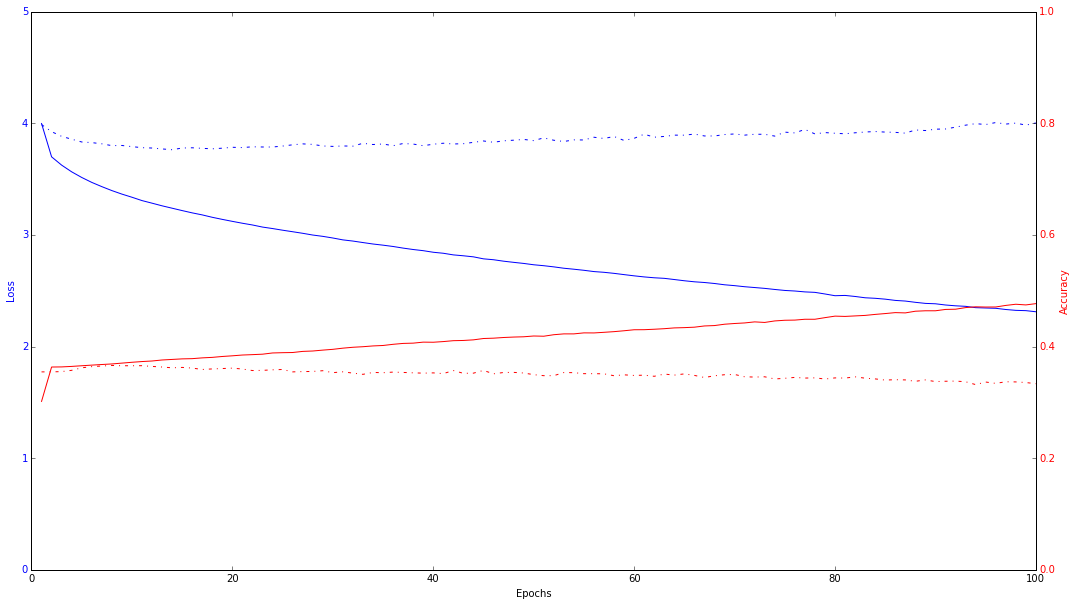

In [4]:
with open('../logs/training_e03.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

Epoch 100:
```
[INIT] Loaded annotations from validation subset.
	Number of ground truth instances: 4850
	Number of predictions: 13965
[RESULTS] Performance on ActivityNet untrimmed video classification task.
	Mean Average Precision: 0.037673804594
	Hit@3: 0.127606855255
	Avg Hit@3: 0.127606855255
```

# Experiment 4

Only one recurrent layer (128-LSTM) to learn from the audio features. Batch normalization for each kind of feature: mfcc and spec. At the end a softmax layer to classify the activity for the sequence returned by the recurrent layer. Use the sample weight property to weight the loss for background instances and try to make it slower its training.
The learning rate is `1e-3`. 

```
nb_experiment: 4
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 0.001
background_weight: 0.6

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
mfcc_features (InputLayer)       (256, 20, 80)         0                                            
____________________________________________________________________________________________________
spec_features (InputLayer)       (256, 20, 8)          0                                            
____________________________________________________________________________________________________
mfcc_normalization (BatchNormaliz(256, 20, 80)         160         mfcc_features[0][0]              
____________________________________________________________________________________________________
spec_normalization (BatchNormaliz(256, 20, 8)          16          spec_features[0][0]              
____________________________________________________________________________________________________
merge_1 (Merge)                  (256, 20, 88)         0           mfcc_normalization[0][0]         
                                                                   spec_normalization[0][0]         
____________________________________________________________________________________________________
lstm (LSTM)                      (256, 20, 128)        111104      merge_1[0][0]                    
____________________________________________________________________________________________________
softmax (TimeDistributed)        (256, 20, 201)        25929       lstm[0][0]                       
====================================================================================================
Total params: 137209
____________________________________________________________________________________________________
```

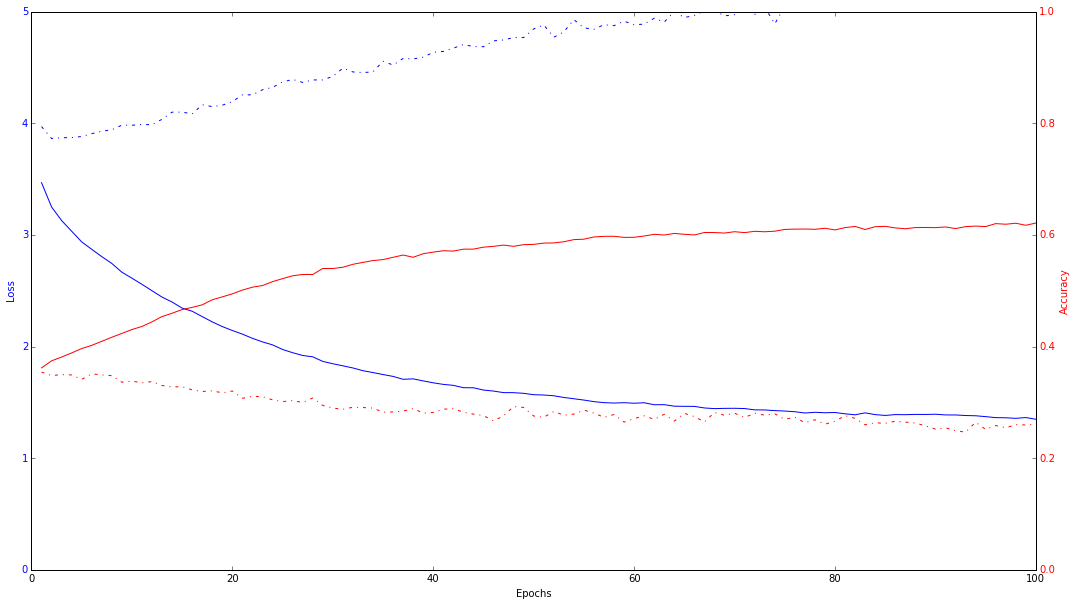

In [5]:
with open('../logs/training_e04.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt)

# Experiment 5

Only one recurrent layer (128-LSTM) to learn from the audio features. Batch normalization for each kind of feature: mfcc and spec. At the end a softmax layer to classify the activity for the sequence returned by the recurrent layer. Use the sample weight property to weight the loss for background instances and try to make it slower its training.
The learning rate is `1e-5`. 

```
nb_experiment: 5
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 1e-05
background_weight: 0.6

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
mfcc_features (InputLayer)       (256, 20, 80)         0                                            
____________________________________________________________________________________________________
spec_features (InputLayer)       (256, 20, 8)          0                                            
____________________________________________________________________________________________________
mfcc_normalization (BatchNormaliz(256, 20, 80)         160         mfcc_features[0][0]              
____________________________________________________________________________________________________
spec_normalization (BatchNormaliz(256, 20, 8)          16          spec_features[0][0]              
____________________________________________________________________________________________________
merge_1 (Merge)                  (256, 20, 88)         0           mfcc_normalization[0][0]         
                                                                   spec_normalization[0][0]         
____________________________________________________________________________________________________
lstm (LSTM)                      (256, 20, 128)        111104      merge_1[0][0]                    
____________________________________________________________________________________________________
softmax (TimeDistributed)        (256, 20, 201)        25929       lstm[0][0]                       
====================================================================================================
Total params: 137209
____________________________________________________________________________________________________
```

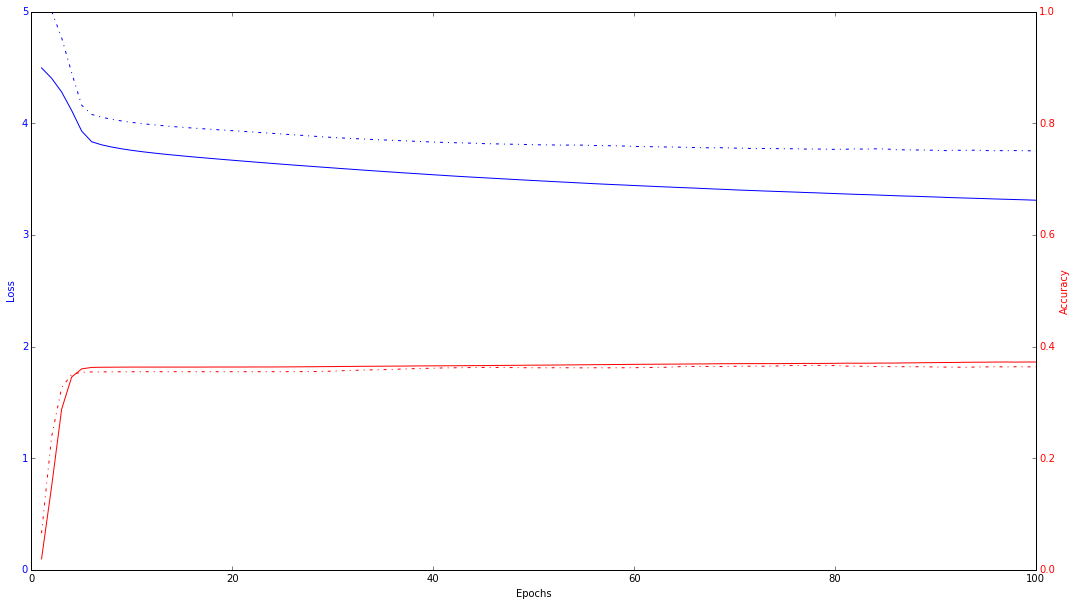

In [19]:
with open('../logs/training_e05.log', 'r') as f:
    txt = f.read()

plot_on_training(txt)

# Experiment 6

Only one recurrent layer (128-LSTM) to learn from the audio features. Batch normalization for each kind of feature: mfcc and spec. At the end a softmax layer to classify the activity for the sequence returned by the recurrent layer. Use the sample weight property to weight the loss for background instances and try to make it slower its training.
The learning rate is `1e-6`. 

```
nb_experiment: 6
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 1e-06
background_weight: 0.6

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
mfcc_features (InputLayer)       (256, 20, 80)         0                                            
____________________________________________________________________________________________________
spec_features (InputLayer)       (256, 20, 8)          0                                            
____________________________________________________________________________________________________
mfcc_normalization (BatchNormaliz(256, 20, 80)         160         mfcc_features[0][0]              
____________________________________________________________________________________________________
spec_normalization (BatchNormaliz(256, 20, 8)          16          spec_features[0][0]              
____________________________________________________________________________________________________
merge_1 (Merge)                  (256, 20, 88)         0           mfcc_normalization[0][0]         
                                                                   spec_normalization[0][0]         
____________________________________________________________________________________________________
lstm (LSTM)                      (256, 20, 128)        111104      merge_1[0][0]                    
____________________________________________________________________________________________________
softmax (TimeDistributed)        (256, 20, 201)        25929       lstm[0][0]                       
====================================================================================================
Total params: 137209
____________________________________________________________________________________________________
```

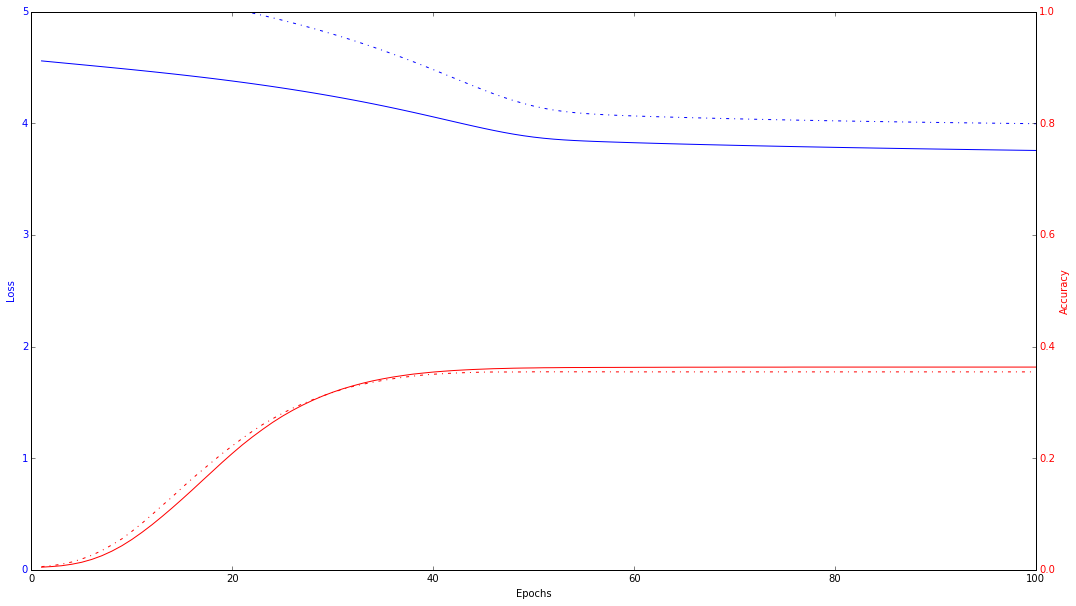

In [24]:
with open('../logs/training_e06.log', 'r') as f:
    txt = f.read()

plot_on_training(txt)

# Experiment 7

Only one recurrent layer (256-LSTM) to learn from the audio features. Batch normalization for each kind of feature: mfcc and spec. At the end a softmax layer to classify the activity for the sequence returned by the recurrent layer. Use the sample weight property to weight the loss for background instances and try to make it slower its training.
The learning rate is `1e-5`. 

```
nb_experiment: 7
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 1e-05
background_weight: 0.6

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
mfcc_features (InputLayer)       (256, 20, 80)         0                                            
____________________________________________________________________________________________________
spec_features (InputLayer)       (256, 20, 8)          0                                            
____________________________________________________________________________________________________
mfcc_normalization (BatchNormaliz(256, 20, 80)         160         mfcc_features[0][0]              
____________________________________________________________________________________________________
spec_normalization (BatchNormaliz(256, 20, 8)          16          spec_features[0][0]              
____________________________________________________________________________________________________
merge_1 (Merge)                  (256, 20, 88)         0           mfcc_normalization[0][0]         
                                                                   spec_normalization[0][0]         
____________________________________________________________________________________________________
lstm (LSTM)                      (256, 20, 256)        353280      merge_1[0][0]                    
____________________________________________________________________________________________________
softmax (TimeDistributed)        (256, 20, 201)        51657       lstm[0][0]                       
====================================================================================================
Total params: 405113
____________________________________________________________________________________________________
```

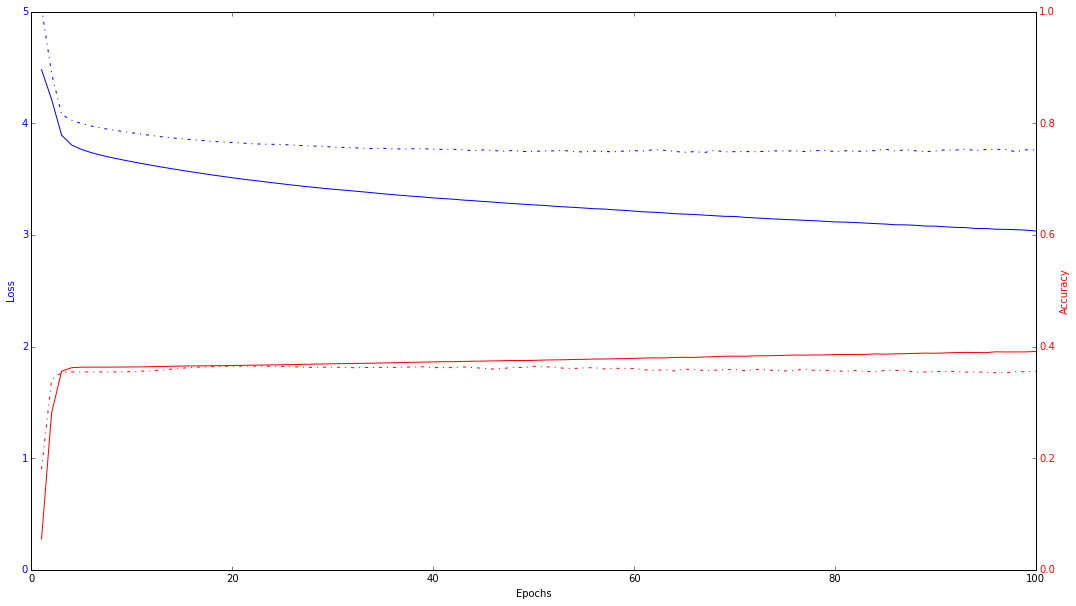

In [25]:
with open('../logs/training_e07.log', 'r') as f:
    txt = f.read()

plot_on_training(txt)

# Experiment 8

Only one recurrent layer (128-LSTM) to learn from the audio features. Batch normalization for each kind of feature: mfcc and spec. At the end a softmax layer to classify the activity for the sequence returned by the recurrent layer. Use the sample weight property to weight the loss for background instances and try to make it slower its training.
The learning rate is `1e-4` at the beginig. `1e-5`after 40 epochs and `1e-6` after 80 epochs.

```
nb_experiment: 8
batch_size: 256
timesteps: 20
epochs: 120
learning rate: 0.0001
background_weight: 0.3

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
mfcc_features (InputLayer)       (256, 20, 80)         0                                            
____________________________________________________________________________________________________
spec_features (InputLayer)       (256, 20, 8)          0                                            
____________________________________________________________________________________________________
mfcc_normalization (BatchNormaliz(256, 20, 80)         160         mfcc_features[0][0]              
____________________________________________________________________________________________________
spec_normalization (BatchNormaliz(256, 20, 8)          16          spec_features[0][0]              
____________________________________________________________________________________________________
merge_1 (Merge)                  (256, 20, 88)         0           mfcc_normalization[0][0]         
                                                                   spec_normalization[0][0]         
____________________________________________________________________________________________________
lstm (LSTM)                      (256, 20, 128)        111104      merge_1[0][0]                    
____________________________________________________________________________________________________
softmax (TimeDistributed)        (256, 20, 201)        25929       lstm[0][0]                       
====================================================================================================
Total params: 137209
____________________________________________________________________________________________________
```

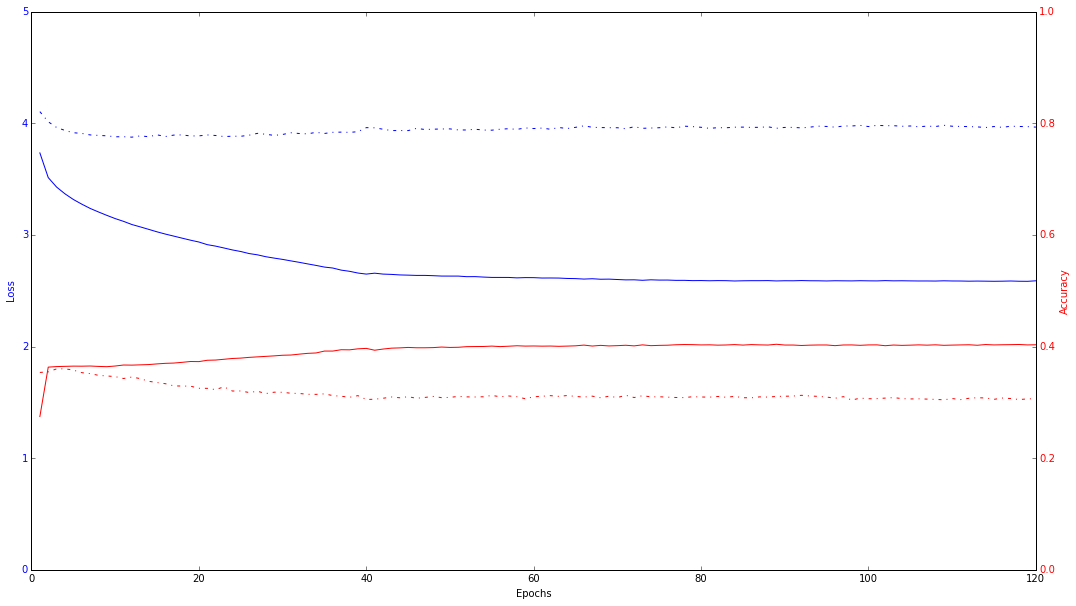

In [27]:
with open('../logs/training_e08.log', 'r') as f:
    txt = f.read()

plot_on_training(txt, max_epochs=120)

# Experiment 9

Only one recurrent layer 2x(512-LSTM) [DEEP] to learn from the audio features. Batch normalization for each kind of feature: mfcc and spec. At the end a softmax layer to classify the activity for the sequence returned by the recurrent layer. Use the sample weight property to weight the loss for background instances and try to make it slower its training.
The learning rate is `1e-5`.

```
nb_experiment: 9
batch_size: 256
timesteps: 20
epochs: 120
learning rate: 1e-05
background_weight: 0.3

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
mfcc_features (InputLayer)       (256, 20, 80)         0                                            
____________________________________________________________________________________________________
spec_features (InputLayer)       (256, 20, 8)          0                                            
____________________________________________________________________________________________________
mfcc_normalization (BatchNormaliz(256, 20, 80)         160         mfcc_features[0][0]              
____________________________________________________________________________________________________
spec_normalization (BatchNormaliz(256, 20, 8)          16          spec_features[0][0]              
____________________________________________________________________________________________________
merge_1 (Merge)                  (256, 20, 88)         0           mfcc_normalization[0][0]         
                                                                   spec_normalization[0][0]         
____________________________________________________________________________________________________
lstm1 (LSTM)                     (256, 20, 512)        1230848     merge_1[0][0]                    
____________________________________________________________________________________________________
lstm2 (LSTM)                     (256, 20, 512)        2099200     lstm1[0][0]                      
____________________________________________________________________________________________________
softmax (TimeDistributed)        (256, 20, 201)        103113      lstm2[0][0]                      
====================================================================================================
Total params: 3433337
____________________________________________________________________________________________________
```

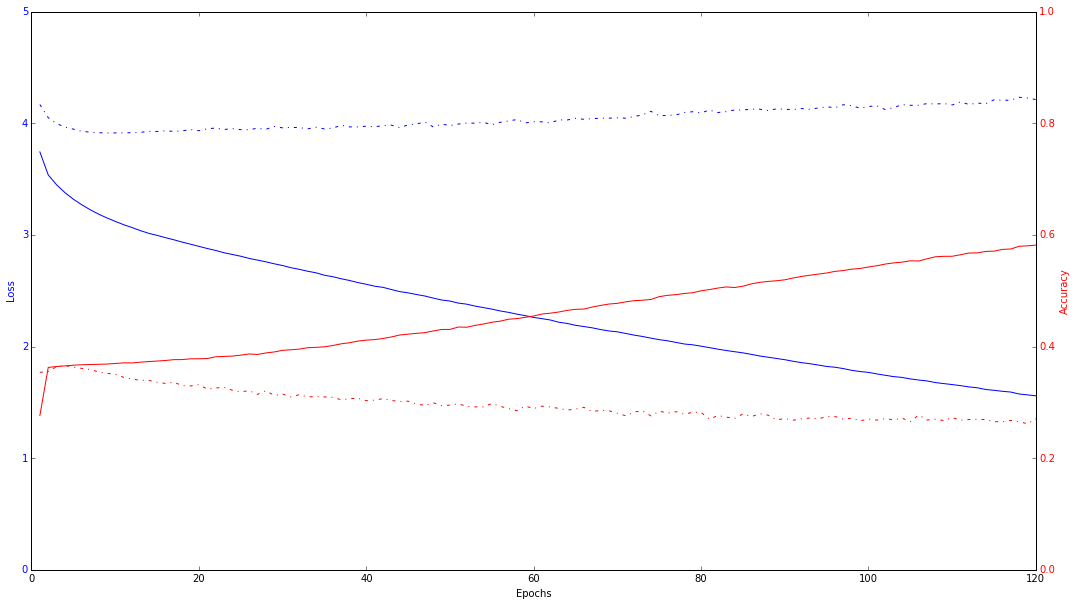

In [32]:
with open('../logs/training_e09.log', 'r') as f:
    txt = f.read()

plot_on_training(txt, max_epochs=120)